<a href="https://colab.research.google.com/github/haiboli-ingo/Video-Lab1/blob/main/Lab1_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Basic Video **Operations**

# Introduction

The goal of this lab is to get familiar with how to process digital video by using Python. Specifically, by participating this lab you will:

Get basic knowledge on the processing of video frames;

Learn how to break a video file into frames and process individual frames for a color space conversion;
 
Generate video files from indexed frames.

Please follow these steps to prepare for the tasks:
1. Download the given video file in the course files and add it to the project files.
2. Import the libraries below.

In [ ]:
#LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import pylab
from google.colab.patches import cv2_imshow


# Tasks

Task 1. Frame Operations

1. Add code to the #VIDEO block to extract a random frame from your video file. Tip: The frames read out by cv2 can be worked on with numpy, pillow or matplotlib.

2. Finish the function in the #DISPLAY IMAGE block to show four pictures next to each other: The extracted color frame, and then its R, G and B layers as black and white pictures.  




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

41.44196556728867


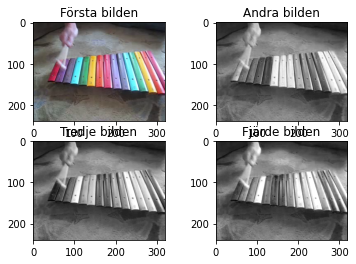

In [ ]:
#VIDEO

# Set up to read video. Set string to name of your clip.
cap = cv2.VideoCapture('test_video.mp4')

if cap.isOpened() == False:
    print("That's probably not the name of your clip")

# Some information about the video file
cap_e = int(cap.get(0)) # Elapsed video time in milliseconds
cap_w = int(cap.get(3)) # Frame width
cap_h = int(cap.get(4)) # Frame height
cap_r = int(cap.get(5)) # Frame rate
cap_l = int(cap.get(7)) # Length in number of frames
# Under VideoCapture::get is a list of attributes
# https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-open

# Set up to write video. You can set title and resolution.

RGBresult = cv2.VideoWriter('RGBresult.mp4', cv2.VideoWriter_fourcc(*'MP4V'), cap_r, (cap_w, cap_h))

frame_list = []
psnr_list = []
while True:
    # ret is true if video.read() returns a frame
    # frame is the frame returned
    ret, frame = cap.read()
  
    if ret is True:
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      frame_list.append(frame)
              
      # Uncomment to call functions that do something to frame
      dispimage(frame)
      frame_a = frameRGB2YUV(frame)
      frame_b = frameYUV2RGB(frame_a)
      psnr = CalculatePSNR(frame, frame_b)
      psnr_list.append(psnr)
      RGBresult.write(cv2.cvtColor(frame_b, cv2.COLOR_BGR2RGB))

      # 'q' to cancel
      if cv2.waitKey(1) & 0xFF == ord('q'):
          break
    else:
        break

# Close down
cap.release()
RGBresult.release()
cv2.destroyAllWindows()

print(np.mean(psnr_list))
rand_frame = frame_list[10]








In [ ]:
# DISPLAY IMAGE
def dispimage(rand_frame):
 
  r, g, b    = rand_frame[:, :, 0], rand_frame[:, :, 1], rand_frame[:, :, 2]

  plt.subplot(2,2,1)  # 1 rad, 2 kolumner, plats 1
  plt.imshow(rand_frame, cmap='gray')
  plt.title('Första bilden')

  plt.subplot(2,2,2)  # 1 rad, 2 kolumner, plats 2
  plt.imshow(r, cmap='gray')
  plt.title('Andra bilden')

  plt.subplot(2,2,3)  # 1 rad, 2 kolumner, plats 2
  plt.imshow(g, cmap='gray')
  plt.title('Tredje bilden')

  plt.subplot(2,2,4)  # 1 rad, 2 kolumner, plats 2
  plt.imshow(b, cmap='gray')
  plt.title('Fjärde bilden')



Task 2: Color Space Conversion

The extracted image should be converted from the “RGB” format to a new color space “YUV” by 
1. Completing the function ‘frameRGB2YUV’. This function converts a RGB frame loaded from a video file to a YUV frame. In most real-world applications the color components U and V are usually down-sampled to a size of 1⁄2 of Y for saving communication bandwidth. This function should also downsample the frame and reconstruct it by upsampling. (Think about what the purpose of down- and upsampling is!)
2. Completing the function ‘frameYUV2RGB’, which is the inverse color transformation, that is, back to RGB from YUV. 
3. Completing the function ‘CalculatePSNR’, which should calculate the signal-to-noise ratio between two pictures. 

You can calculate the signal-to-noise ratio with this formula (i = image intensity): $$PSNR[dB] = 10 * \log_{10}{\frac{255^2}{(i_1-i_2)^2}}$$ 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Andra bilden')

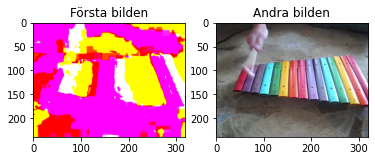

In [ ]:

#RGB2YUV
def frameRGB2YUV(frame):
  imagearray = np.array(frame)
  imagearray = imagearray.astype("uint8")  
  newimg = frame.copy()

  rows, cols = frame.shape[0:2]
 
  R = imagearray[:,:,0]
  G = imagearray[:,:,1]
  B = imagearray[:,:,2]
  Y = 0.299*R + 0.587*G + 0.114*B
  U = -0.147*R - 0.289*G + 0.436*B
  V = 0.615*R - 0.515*G - 0.100*B

  U = cv2.resize(U, (int(cols/2), int(rows/2)))
  V = cv2.resize(V, (int(cols/2), int(rows/2)))

  U = cv2.resize(U, (int(cols), int(rows)))
  V = cv2.resize(V, (int(cols), int(rows)))

  I = np.zeros(frame.shape)
  I[:, :, 0] = Y
  I[:, :, 1] = U
  I[:, :, 2] = V
 
    
  return I
plt.imshow(frameRGB2YUV(rand_frame), cmap='gray')



#YUV2RGB
def frameYUV2RGB(frame):


  Y = frame[:,:,0]
  U = frame[:,:,1]
  V = frame[:,:,2]
  R = 1*Y + 0*U + 1.13983*V
  G = 1*Y - 0.39465*U - 0.58060*V
  B = 1*Y + 2.03211*U + 0*V

  rgb = np.zeros(frame.shape)
  rgb[:, :, 0] = R
  rgb[:, :, 1] = G
  rgb[:, :, 2] = B
  
  rgb = np.clip(rgb, 0, 255).astype('uint8')

  return rgb
plt.imshow(frameYUV2RGB(YUV_image), cmap='gray')


plt.subplot(1,2,1)  # 1 rad, 2 kolumner, plats 1
plt.imshow(frameRGB2YUV(rand_frame), cmap='gray')
plt.title('RGB-YUV')

plt.subplot(1,2,2)  # 1 rad, 2 kolumner, plats 2
plt.imshow(frameYUV2RGB(frameRGB2YUV(rand_frame)), cmap='gray')
plt.title('YUV-RGB')
#frameYUV2RGB(YUV_image)

# this function transforms a RGBframe to its corresponding YUVframe
# Input:
# RGBframe (dimensions == [frameheight * framewidth * 3])
# Output:
# YUVframe (dimensions == [frameheight * framewidth * 3])

# The benefit of YUV encoding is not only that we can easily choose whether
# to show a color image or bw image. It is also that we can compress
# the media by reducing the resolution of the U and V layers.
# To simulate the real case after you do color conversion, you can use the 
# built in resize function in cv2, or you can make your own with numpy  
# to first do "downsampling" on U and V into half size and then "up sampling" 
# to full-size U and V.

# Strongly recommend to do a "matrix" wise processing 
# instead of pixel wise (solutions using nested for loops)

# Now you are on your own... 

In [ ]:
#PSNR
def CalculatePSNR(im1, im2): 
  diff = np.mean((im1 - im2)**2)
  PSNR = np.log10(255**2/(diff))*10
  return PSNR

CalculatePSNR(frame_list[10],frame_list[11])
# this function calculates the PSNR between two colour images, im1, im2
# you can use numpy.shape to check if two images are of the same size
# otherwise you can for example use numpy.resize to make them match
# PSNR should be in dB 

36.06846132465642

Task 3: Assemble Your Video and Show
1. Adjust the code in the #VIDEO block so you no longer work only on one frame, but on all frames of your video. However, make sure to keep the funcionality to extract frames, as you will need it again. Convert the video from RGB2YUV, subsample it, upsample it, convert it back from YUV2RGB, and assemble all frames into a new video. 
2. Adjust the code in the #PSNR block to calculate the PSNR of the new video (not just a frame). Just as you should get one number from comparing two frames, you should get one number from comparing two entire videos. 
3. Download the new video and show it to TA. 




# Report

Your report should fill the following criteria:
1. A first page with all your group members' names.
2. An explanation of how you handled the downsampling and upsampling of the U and V layers.  
3. The PSNR of your new video. 
4. Your entire notebook, with relevant images and string plotted and printed. 

Submit your report as a **single pdf**, combined from your text and your notebook.

Upload your report to “Assignments/Lab1”.

Deadline is 8 April 2020 23:59

